# Testing the data cleaning functions

Edge removal and low baseline data removal with data_cleaning.py -- comparing cleaning and raw data. 

In [55]:
Cdata_path = '/Users/Megan/data_analysis/Aug02_2018_B3/B3_TS/Cleaned/rg_B3_TS_ZP_16.npz'

In [128]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import glob
import preprocess.join_z_stacks as pp

In [57]:
Cdata = np.load(Cdata_path)

In [58]:
cdata = Cdata.f.arr_0

In [59]:
cdata.item()['xy'][0]

array([149., 464.,   8.])

In [60]:
cdata = {key:cdata.item()[key] for key in cdata.item()}

In [61]:
cdata['xy'][0]

array([149., 464.,   8.])

Let's look at the position data for this test file. 

Text(0,0.5,'y pixel')

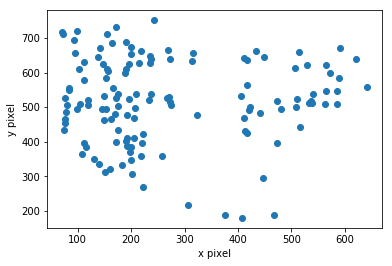

In [33]:
plt.scatter(cdata['xy'][:,0], cdata['xy'][:,1])
plt.xlabel('x pixel')
plt.ylabel('y pixel')

In [34]:
Rdata_path = '/Users/Megan/data_analysis/Aug02_2018_B3/B3_TS/Extracted/rg_B3_TS_ZP_16.npz'

In [35]:
Rdata = np.load(Rdata_path)

In [50]:
rdata = Rdata['xy']

Let's compare before and after

Text(0,0.5,'y pixel')

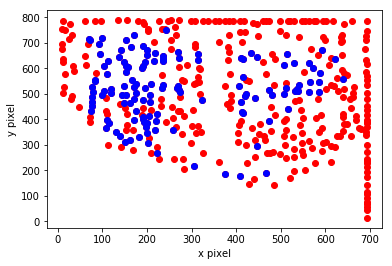

In [54]:
plt.scatter(rdata[:,0], rdata[:,1], c = 'r')
plt.scatter(cdata['xy'][:,0], cdata['xy'][:,1], c = 'b')
plt.xlabel('x pixel')
plt.ylabel('y pixel')

Hmm. Cleaning has certainly removed the edges (with a margin of 10) but the baseline of 200 may have removed too many of other time-series. However, these are likely to be represented in other slices (this is something that needs further investigation).

OK, let's look at a selection of cleaned slices.

In [88]:
path = '/Users/Megan/data_analysis/Aug02_2018_B3/B3_TS/'
flag = 'ZP_'
rfilelist = glob.glob(path+ 'Extracted/*' + flag + '*.npz')
cfilelist = glob.glob(path+ 'Cleaned/*' + flag + '*.npz')

In [89]:
rdatalist = sorted(rfilelist, key = pp.z_coordinate)
cdatalist = sorted(cfilelist, key = pp.z_coordinate)

In [100]:
# Cdata = np.load(cdatalist[0])
# cdata = Cdata.f.arr_0
# cdata = {key:cdata.item()[key] for key in cdata.item()}
# xc = cdata['xy'][:,0]
# yc = cdata['xy'][:,1]

In [131]:
#fig, axs = plt.subplots(26,1, figsize = (6,25))

In [130]:
for i in range(len(cdatalist)):
    rdata = np.load(rdatalist[i])
    rdata = rdata['xy']
    Cdata = np.load(cdatalist[i])
    cdata = Cdata.f.arr_0
    cdata = {key:cdata.item()[key] for key in cdata.item()}
    cdata = cdata['xy']
    axs[i].scatter(rdata[:,0], rdata[:,1], c='r')
    axs[i].scatter(cdata[:,0], cdata[:,1], c ='b')
    fig.show()

In [126]:
plt.show()